## Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.decomposition import NMF, PCA
from sklearn.preprocessing import Normalizer, MaxAbsScaler, StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline

In [2]:
# Load the files:
cust_features = pd.read_csv('./customer_features.csv')
cust_labels = pd.read_csv('./customer_labels.csv')
cust_id = pd.read_csv('./customer_id.csv')

In [3]:
cust_features.drop(columns = 'Unnamed: 0', inplace = True)
cust_labels.drop(columns = 'Unnamed: 0', inplace = True)

In [4]:
# Best columns to keep from best_cols using SelectKBest method.

#best_cols = ['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'ANZ_TITEL',
#             'CAMEO_DEUG_2015', 'CJT_GESAMTTYP', 'D19_BANKEN_ANZ_12', 'D19_BANKEN_ANZ_24', 'D19_BANKEN_DATUM',
#             'D19_BANKEN_OFFLINE_DATUM', 'D19_BANKEN_ONLINE_DATUM', 'D19_BANKEN_ONLINE_QUOTE_12', 'D19_GESAMT_ANZ_12',
#             'D19_GESAMT_ANZ_24', 'D19_GESAMT_DATUM', 'D19_GESAMT_OFFLINE_DATUM', 'D19_GESAMT_ONLINE_DATUM',
#             'D19_GESAMT_ONLINE_QUOTE_12', 'D19_KONSUMTYP', 'D19_TELKO_ANZ_12', 'D19_TELKO_ANZ_24', 'D19_TELKO_DATUM',
#             'D19_TELKO_OFFLINE_DATUM', 'D19_TELKO_ONLINE_DATUM', 'D19_VERSAND_ANZ_12', 'D19_VERSAND_ANZ_24', 'D19_VERSAND_DATUM',
#             'D19_VERSAND_OFFLINE_DATUM', 'D19_VERSAND_ONLINE_DATUM', 'D19_VERSAND_ONLINE_QUOTE_12', 'D19_VERSI_ANZ_12',
#             'D19_VERSI_ANZ_24', 'EWDICHTE', 'FINANZTYP', 'FINANZ_ANLEGER', 'FINANZ_MINIMALIST', 'FINANZ_SPARER',
#             'FINANZ_UNAUFFAELLIGER', 'FINANZ_VORSORGER', 'GEBAEUDETYP', 'GEBAEUDETYP_RASTER', 'GEBURTSJAHR',
#             'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE', 'HH_EINKOMMEN_SCORE', 'KBA05_ALTER4', 'KBA05_ANTG2', 'KBA05_ANTG4',
#             'KBA05_CCM3', 'KBA05_CCM4', 'KBA05_DIESEL', 'KBA05_FRAU', 'KBA05_HERST1', 'KBA05_HERST2', 'KBA05_KRSAQUOT',
#             'KBA05_KRSHERST1', 'KBA05_KRSHERST2', 'KBA05_KRSZUL', 'KBA05_KW2', 'KBA05_KW3', 'KBA05_MAXAH', 'KBA05_MAXBJ',
#             'KBA05_MAXSEG', 'KBA05_MOD1', 'KBA05_MOD3', 'KBA05_MOD8', 'KBA05_MOTOR', 'KBA05_SEG10', 'KBA05_SEG4', 'KBA05_SEG5',
#             'KBA05_SEG6', 'KBA05_SEG7', 'KBA05_SEG8', 'KBA05_VORB0', 'KBA05_ZUL1', 'KBA05_ZUL2', 'KBA05_ZUL4',
#             'KBA13_ALTERHALTER_45', 'KBA13_ALTERHALTER_61', 'KBA13_ANZAHL_PKW', 'KBA13_AUDI', 'KBA13_BMW', 'KBA13_CCM_1500',
#             'KBA13_CCM_2000', 'KBA13_CCM_2500', 'KBA13_CCM_2501', 'KBA13_CCM_3000', 'KBA13_CCM_3001', 'KBA13_FIAT',
#             'KBA13_HALTER_40', 'KBA13_HALTER_45', 'KBA13_HALTER_55', 'KBA13_HALTER_65', 'KBA13_HALTER_66',
#             'KBA13_HERST_AUDI_VW', 'KBA13_HERST_BMW_BENZ', 'KBA13_HERST_EUROPA', 'KBA13_HERST_FORD_OPEL', 'KBA13_KMH_140',
#             'KBA13_KMH_211', 'KBA13_KMH_250', 'KBA13_KMH_251', 'KBA13_KRSHERST_AUDI_VW', 'KBA13_KRSHERST_BMW_BENZ',
#             'KBA13_KRSZUL_NEU', 'KBA13_KW_121', 'KBA13_MERCEDES', 'KBA13_MOTOR', 'KBA13_OPEL', 'KBA13_PEUGEOT',
#             'KBA13_SEG_GROSSRAUMVANS', 'KBA13_SEG_MINIVANS', 'KBA13_SEG_MINIWAGEN', 'KBA13_SEG_OBEREMITTELKLASSE',
#             'KBA13_SEG_OBERKLASSE', 'KBA13_SEG_SPORTWAGEN', 'KBA13_SEG_UTILITIES', 'KBA13_SEG_VAN', 'KBA13_SITZE_4',
#             'KBA13_SITZE_5', 'KBA13_SITZE_6', 'KBA13_VORB_0', 'KBA13_VW', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB',
#             'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'MIN_GEBAEUDEJAHR',
#             'ONLINE_AFFINITAET', 'ORTSGR_KLS9', 'PLZ8_ANTG1', 'PLZ8_ANTG2', 'PLZ8_ANTG3', 'PLZ8_ANTG4', 'PLZ8_BAUMAX',
#             'PLZ8_GBZ', 'PLZ8_HHZ', 'PRAEGENDE_JUGENDJAHRE', 'RELAT_AB', 'RETOURTYP_BK_S', 'SEMIO_DOM', 'SEMIO_ERL',
#             'SEMIO_FAM', 'SEMIO_KAEM', 'SEMIO_KRIT', 'SEMIO_KULT', 'SEMIO_LUST', 'SEMIO_PFLICHT', 'SEMIO_RAT',
#             'SEMIO_REL', 'SEMIO_SOZ', 'SEMIO_VERT', 'SHOPPER_TYP', 'VERS_TYP', 'WOHNDAUER_2008', 'W_KEIT_KIND_HH',
#             'ZABEOTYP', 'CAMEO_DEU_2015_2D', 'CAMEO_DEU_2015_5D', 'CAMEO_DEU_2015_6B', 'CAMEO_DEU_2015_7B',
#             'CAMEO_DEU_2015_7C', 'CAMEO_DEU_2015_9E', 'OST_WEST_KZ_W']

# Sums_now list which used the PCA method for feature selection.
best_cols = ['KBA13_ANZAHL_PKW', 'ANZ_HAUSHALTE_AKTIV', 'LP_LEBENSPHASE_FEIN', 'MIN_GEBAEUDEJAHR', 'D19_GESAMT_ONLINE_QUOTE_12',
             'D19_VERSAND_ONLINE_QUOTE_12', 'GEBURTSJAHR', 'D19_GESAMT_ONLINE_DATUM', 'D19_VERSAND_ONLINE_DATUM', 'LP_LEBENSPHASE_GROB',
             'D19_VERSAND_DATUM', 'D19_GESAMT_DATUM', 'LP_FAMILIE_FEIN', 'LP_STATUS_FEIN', 'D19_GESAMT_ANZ_24', 'D19_VERSAND_ANZ_24',
             'D19_GESAMT_ANZ_12', 'D19_VERSAND_ANZ_12', 'PRAEGENDE_JUGENDJAHRE', 'LP_STATUS_GROB', 'LP_FAMILIE_GROB', 'CAMEO_DEUG_2015',
             'D19_KONSUMTYP', 'CJT_GESAMTTYP', 'ONLINE_AFFINITAET', 'MOBI_REGIO', 'HH_EINKOMMEN_SCORE', 'KBA05_ANTG1', 'FINANZ_MINIMALIST',
             'KBA05_GBZ', 'D19_BANKEN_ONLINE_QUOTE_12', 'D19_BANKEN_DATUM', 'ORTSGR_KLS9', 'D19_BANKEN_ONLINE_DATUM', 'D19_GESAMT_OFFLINE_DATUM',
             'GEBAEUDETYP', 'PLZ8_BAUMAX', 'INNENSTADT', 'BALLRAUM', 'D19_VERSAND_OFFLINE_DATUM', 'WOHNDAUER_2008', 'EWDICHTE', 'ANZ_HH_TITEL',
             'KBA05_AUTOQUOT', 'KONSUMNAEHE', 'PLZ8_GBZ', 'FINANZ_HAUSBAUER', 'SEMIO_VERT', 'FINANZ_SPARER', 'SEMIO_KAEM', 'RETOURTYP_BK_S',
             'PLZ8_ANTG1', 'FINANZ_ANLEGER', 'FINANZ_VORSORGER', 'SEMIO_LUST', 'GEBAEUDETYP_RASTER', 'SEMIO_RAT', 'SEMIO_DOM', 'KBA13_HALTER_55',
             'KBA05_ANTG4', 'SEMIO_PFLICHT', 'KBA05_KRSAQUOT', 'KBA13_ALTERHALTER_60', 'KBA13_AUTOQUOTE', 'SEMIO_KRIT', 'D19_TELKO_DATUM',
             'ANZ_PERSONEN', 'GFK_URLAUBERTYP', 'KBA13_HALTER_50', 'PLZ8_ANTG3', 'REGIOTYP', 'ZABEOTYP', 'PLZ8_ANTG4', 'KBA13_HALTER_60',
             'ALTERSKATEGORIE_GROB', 'KBA05_ANHANG', 'KBA13_SEG_VAN', 'KBA13_SEG_GROSSRAUMVANS', 'KBA13_HALTER_35', 'FINANZ_UNAUFFAELLIGER',
             'RELAT_AB', 'KBA13_SEG_MINIVANS', 'FINANZTYP', 'KBA05_ANTG2', 'D19_BANKEN_ANZ_24', 'SEMIO_MAT', 'SEMIO_REL', 'KBA05_MOTRAD',
             'KBA13_HALTER_20', 'SEMIO_TRADV', 'GREEN_AVANTGARDE', 'KBA13_HALTER_30', 'KBA05_DIESEL', 'KBA13_HERST_SONST',
             'KBA13_FAB_SONSTIGE', 'KBA13_SITZE_6', 'KBA05_ALTER3', 'KBA05_SEG10', 'KBA13_ALTERHALTER_45', 'KBA13_HERST_FORD_OPEL',
             'KBA05_MOD8', 'KBA05_SEG7', 'KBA05_ALTER4', 'KBA13_HALTER_40', 'KBA05_ANTG3', 'KBA13_KRSAQUOT', 'KBA13_SEG_GELAENDEWAGEN',
             'HEALTH_TYP', 'KBA13_OPEL', 'KBA05_FRAU', 'KBA13_CCM_3001', 'PLZ8_ANTG2', 'KBA05_SEG5', 'D19_BANKEN_ANZ_12', 'KBA05_SEG9',
             'KBA05_MODTEMP', 'KBA05_CCM3', 'KBA13_FORD', 'KBA13_SEG_UTILITIES', 'KBA05_HERST5', 'WOHNLAGE', 'KBA13_VW', 'KBA05_VORB1',
             'D19_VERSI_ANZ_24', 'KBA13_CCM_1500', 'KBA05_MAXAH', 'KBA05_ZUL4', 'KBA13_HERST_AUDI_VW', 'KBA13_KMH_140', 'KBA05_SEG8',
             'KBA13_KRSSEG_VAN', 'KBA13_SEG_KOMPAKTKLASSE', 'KBA13_CCM_2000', 'KBA05_KW3', 'ANREDE_KZ', 'KBA13_BJ_2009', 'KBA13_KMH_0_140',
             'KBA05_HERST2', 'SHOPPER_TYP', 'W_KEIT_KIND_HH', 'KBA05_ZUL3', 'SEMIO_FAM', 'D19_TELKO_OFFLINE_DATUM', 'KBA13_KW_110',
             'KBA13_MOTOR', 'KBA13_CCM_3000', 'KBA13_ALTERHALTER_30', 'OST_WEST_KZ_W', 'KBA05_CCM4', 'KBA05_HERST1', 'KBA13_SEG_WOHNMOBILE']

In [5]:
#cust_features = cust_features[best_cols]

In [6]:
cust_features.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_PERSONEN,ANZ_TITEL,BALLRAUM,CAMEO_DEUG_2015,CAMEO_DEU_2015,CJT_GESAMTTYP,...,SEMIO_REL,SEMIO_SOZ,SEMIO_TRADV,SEMIO_VERT,SHOPPER_TYP,VERS_TYP,WOHNDAUER_2008,WOHNLAGE,W_KEIT_KIND_HH,ZABEOTYP
0,4,1,1.0,0.0,2.0,0.0,3.0,1.0,1A,5.0,...,2,6,1,6,3.0,1.0,9.0,7.0,6.0,3
1,4,1,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,...,2,3,1,7,3.0,1.0,9.0,NaN,NaN,3
2,4,2,1.0,0.0,1.0,0.0,7.0,5.0,5D,2.0,...,1,2,1,3,1.0,2.0,9.0,2.0,6.0,3
3,4,1,0.0,NaN,0.0,0.0,7.0,4.0,4C,2.0,...,3,6,4,7,0.0,1.0,9.0,7.0,NaN,1
4,3,1,7.0,0.0,4.0,0.0,3.0,7.0,7B,6.0,...,4,4,4,5,1.0,2.0,9.0,3.0,2.0,1


In [7]:
# Create dummy columns from the categorical data.
def dummy_variables(df, cat_cols, dummy_na=False):
    '''
    Function finds all categorical columns, creats dummy variables and deletes the original.
    Takes in the dataframe and categorical column names list then outouts a dataframe 
    with the dummy variables.
    '''
    for col in cat_cols:
        try:
            # produce the dataframe with dummy variables.
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
            
        except:
            continue
    return df

#Ref this is code that I also used in th seatle project which I think is public on GitHub.

In [8]:
cat_df = cust_features.select_dtypes(include='object')
cat_cols = cat_df.columns

# Create the dummy variables from the categorical columns in df.
cust_data_dum = dummy_variables(cust_features, cat_cols, dummy_na=False)

In [9]:
imputer = SimpleImputer(strategy='most_frequent')
cust_features_im = pd.DataFrame(imputer.fit_transform(cust_data_dum.values),
                                columns = cust_data_dum.columns)

In [10]:
# Population data.
pop_features = pd.read_csv('./population_features.csv')
pop_lrn = pd.read_csv('./population_lrn.csv')

In [11]:
# Lest keep the best of the columns.
#pop_features = pop_features[best_cols]

In [12]:
pop_features.drop(columns = 'Unnamed: 0', inplace = True)

In [13]:
pop_cat_df = pop_features.select_dtypes(include='object')
pop_cat_cols = pop_cat_df.columns

# Once again for the population data lets get those dummies.
pop_data_dum = dummy_variables(pop_features, pop_cat_cols, dummy_na=False)

In [14]:
pop_features_im = pd.DataFrame(imputer.fit_transform(pop_data_dum.values),
                              columns = pop_data_dum.columns)

In [15]:
# A look at the data earlier showed that some of the features
# have a big range and thus should be scaled.

scaler = RobustScaler()T
scaled_pop = pd.DataFrame(scaler.fit_transform(pop_features_im),
                          columns=pop_features_im.columns)

In [16]:
scaled_cust = pd.DataFrame(scaler.fit_transform(cust_features_im),
                           columns=cust_features_im.columns)

In [17]:
# feature selection:
scaled_pop = scaled_pop[best_cols]
scaled_cust = scaled_cust[best_cols]

### Performing Dimentinality Reduction using PCA.
Here we find out the vectors of the maximal variance in this data.

In [18]:
pca = PCA()
pop_pca = pca.fit_transform(scaled_pop)

In [19]:
def pca_plot(pca):
    '''
    Creates a plot associated with the principal components
    
    INPUT: pca - result of PCA model.
            
    OUTPUT:
            None
    '''
    components = len(pca.explained_variance_ratio_)
    index = np.arange(components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(20, 10))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(index, vals)
    ax.plot(index, cumvals)
    
    # Add annottaions that show the percentage of the data described
    # by the priciple component.
    for i in range(components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (index[i]+0.2, vals[i]),
                    va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel('Principal Component', fontsize=15)
    ax.set_ylabel("Percentage Variance Explained (%)", fontsize=15)
    plt.title('Explained Variance Per Principal Component', fontsize=20)
    plt.grid()

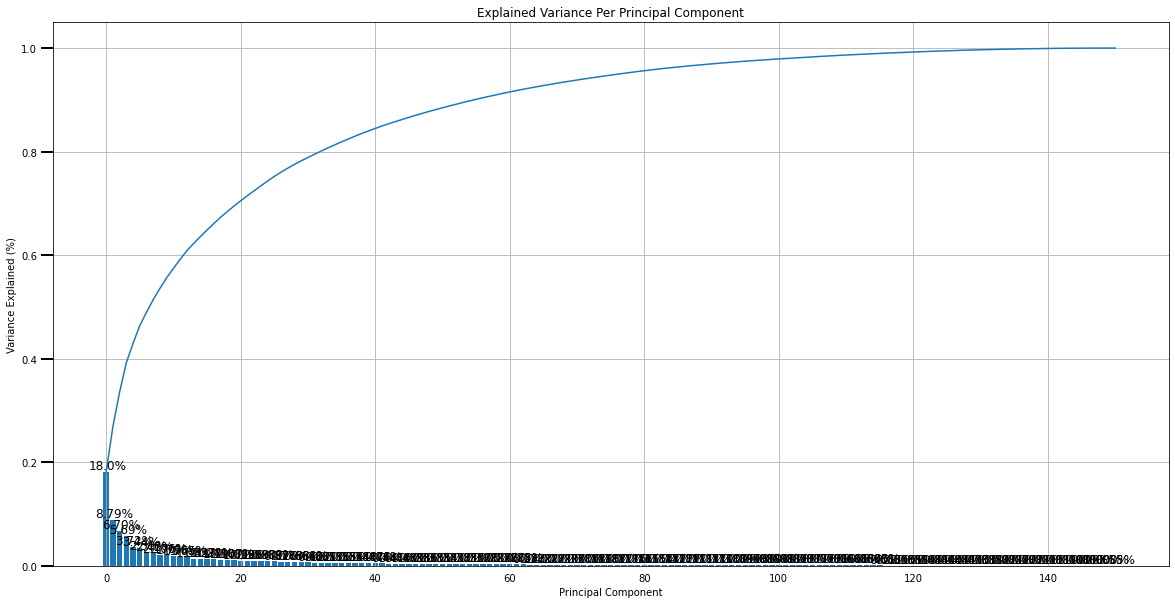

In [20]:
# Investigate the variance accounted for by each principal component.
pca_plot(pca)

#### It looks like 80 PCA components explains ~95% of the data.

In [21]:
pca = PCA(n_components=80)
pop_pca = pca.fit_transform(scaled_pop)

In [22]:
cust_pca = pca.transform(scaled_cust)

In [23]:
scaled_pop.shape

(891221, 151)

In [24]:
scaled_cust.shape

(191652, 151)

In [ ]:
#odd_one_out = []
#for x in scaled_pop.columns:
#    if x not in scaled_cust.columns:
#        odd_one_out.append(x)#

#odd_one_out

### Clustering the data.

In [25]:
from sklearn.cluster import KMeans

In [26]:
def kmeans_score(df, center):
    '''
    Returns the kmeans score regarding Sum of squares distance for points to centers
    
    INPUT:
        df - dataframe we are workin with
        center - k clusters
        
    OUTPUT:
        score - the Sum or suqares distance score
    '''
    kmeans = KMeans(n_clusters=center, random_state=42)
    
    model = kmeans.fit(df)
    
    # Score related to model fit
    sum_of_square = np.abs(model.score(df))
    
    return sum_of_square

In [27]:
# Using the elbow method to find the optimal number of clusters to use.
scores = []
centroid = np.arange(2, 18, 1)

for i in centroid:
    scores.append(kmeans_score(pop_pca, i))

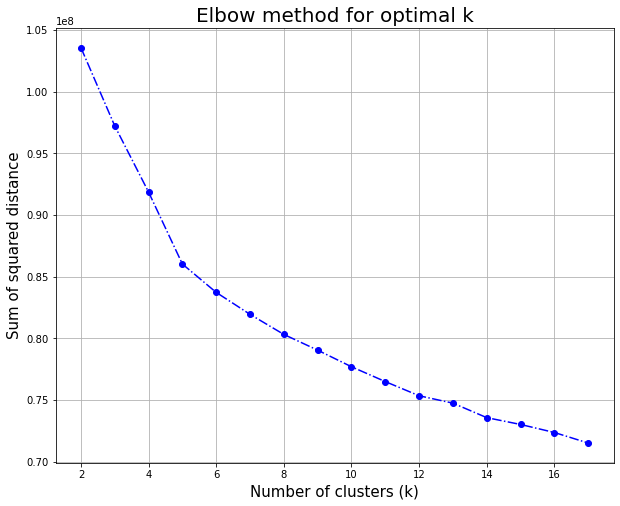

In [28]:
# This shows the change in the cluster distance over the number of clusters
# stated in centroid.

plt.figure(figsize=(10, 8)) 
plt.plot(centroid, scores, linestyle='-.', marker='o', color='b');

plt.title('Elbow method for optimal k', fontsize=20)
plt.xlabel('Number of clusters (k)', fontsize=15)
plt.ylabel('Sum of squared distance', fontsize=15)

plt.rc('xtick', labelsize=15)  
plt.rc('ytick', labelsize=15)
plt.grid()

Looking at the above the elbow look to be at k=5 indicating the optimal k for the dataset is 5.

In [43]:
# Fit the KMeans model with 5 clusters.
kmeans = KMeans(n_clusters=5, random_state=42)
pop_clust = kmeans.fit_predict(pop_pca)

In [44]:
clust_count = pd.Series(pop_clust).value_counts()

clust_pop = pd.DataFrame({'clusters': clust_count.index,
                         'percentage of data':100*clust_count.values/len(pop_clust)})
clust_pop['dataset'] = 'population'

clust_pop

,clusters,percentage of data,dataset
0,1,48.974272,population
1,4,22.431585,population
2,0,19.401136,population
3,3,4.910679,population
4,2,4.282327,population


Clustering the customer data.

In [45]:
cust_clust = kmeans.predict(cust_pca)

In [46]:
cust_clust_count = pd.Series(cust_clust).value_counts()

clust_cust = pd.DataFrame({'clusters': cust_clust_count.index,
                          'percentage of data': 100*cust_clust_count.values/len(cust_clust)})
clust_cust['dataset'] = 'customers'
clust_cust

,clusters,percentage of data,dataset
0,1,74.282554,customers
1,4,18.547680,customers
2,2,3.478701,customers
3,3,3.423914,customers
4,0,0.267151,customers


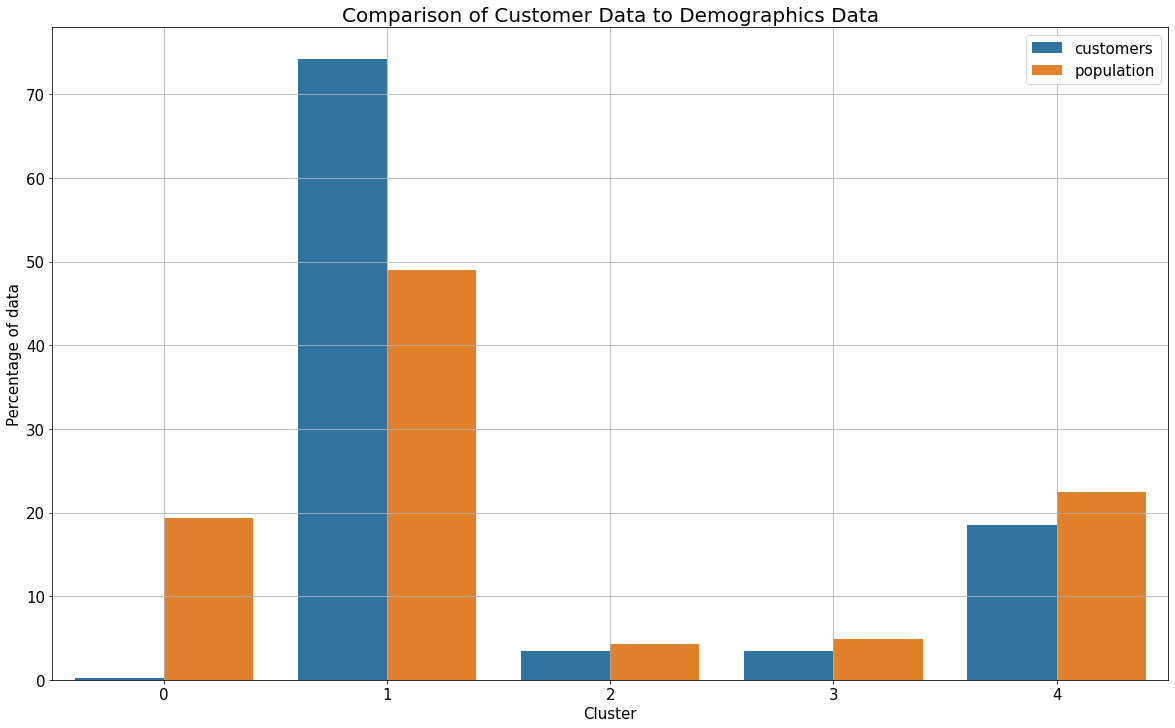

In [47]:
plt.figure(figsize=(20, 12))
sns.barplot(x = 'clusters', y = 'percentage of data', hue='dataset',
            data = pd.concat([clust_cust, clust_pop]))

plt.title('Comparison of Customer Data to Demographics Data', fontsize=20)
plt.xlabel('Cluster', fontsize=15)
plt.ylabel('Percentage of data', fontsize=15)

plt.legend(fontsize=15)
plt.grid()

### Conclusion
The cluster suggests to me that we should should target cluster 1  more that 70% of the customer demographic and almost 50% of the population so should be a good starting point when reachine out to likely people to become customers. 